In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
df=pd.read_csv('../data-wrangling/suicide_unemployment_depresion.csv', index_col=0)
df

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate,suicides_per_100K
0,1985,Antigua and Barbuda,female,0,32292,NaN,240923926,3850,NaN,NaN,0.000000
1,1985,Antigua and Barbuda,male,0,30282,NaN,240923926,3850,NaN,NaN,0.000000
2,1985,Argentina,female,538,13690900,0.694,88416668900,3264,NaN,NaN,3.929617
3,1985,Argentina,male,1450,13399900,0.694,88416668900,3264,NaN,NaN,10.820976
4,1985,Australia,female,425,7313800,NaN,180190994861,12374,8.7628,NaN,5.810933
...,...,...,...,...,...,...,...,...,...,...,...
4637,2016,Romania,male,1643,8054969,NaN,187805922349,10020,6.5875,1.984293,20.397347
4638,2016,Sweden,female,348,4084416,NaN,514459972806,55594,6.5859,5.842276,8.520190
4639,2016,Sweden,male,782,4041436,NaN,514459972806,55594,7.3573,3.147301,19.349558
4640,2016,Thailand,female,842,27496685,NaN,411755164833,6713,0.7143,3.560438,3.062187


In [6]:
df['year']=pd.to_datetime(df['year'], format='%Y')

In [7]:
df['country'].unique()

array(['Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Barbados', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominica', 'Ecuador',
       'France', 'Greece', 'Grenada', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Kuwait', 'Luxembourg', 'Malta',
       'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Panama',
       'Paraguay', 'Portugal', 'Puerto Rico', 'Republic of Korea',
       'Saint Vincent and Grenadines', 'Seychelles', 'Singapore', 'Spain',
       'Sri Lanka', 'Suriname', 'Thailand', 'Trinidad and Tobago',
       'United Kingdom', 'United States', 'Uruguay', 'Belize',
       'Guatemala', 'Norway', 'Saint Lucia', 'Albania', 'Finland',
       'Sweden', 'Turkmenistan', 'Ukraine', 'Guyana', 'Romania',
       'Russian Federation', 'Armenia', 'Azerbaijan', 'Belarus',
       'Czech Republic', 'El Salvador', 'Georgia', 'Germany',
       'Kazakhstan', 'Kyrgyzstan', 'Poland',

In [8]:
###Model per country

In [9]:
# A function to select and loc the data from a country.

def data_country(country):
    i=df.loc[df['country']==country]
    return i

In [10]:
#data_country('Germany').groupby('year').agg({'depression_rate':divide()})
def ratio_FM(country):
    
    #table for female
    f=data_country(country).loc[data_country(country)['sex']=='female']
    #table for male
    m=data_country(country).loc[data_country(country)['sex']=='male']
    #join them
    i=pd.merge(f, m,  how='left', left_on=['country','year'], 
                          right_on = ['country','year'])
    
    #create the ratios
    i['ratio_suicide']=abs(i['suicides_per_100K_y']/i['suicides_per_100K_x'])
    i['ratio_depression']=abs(i['depression_rate_y']/i['depression_rate_x'])
    i['ratio_unemployment']=i['unemployment_y']-i['unemployment_x']
    
    return i[['year','country','gdp_for_year($)_y','HDIforyear_y','suicides_per_100K_y','suicides_per_100K_x','gdp_per_capita($)_y','ratio_suicide','ratio_depression','unemployment_y','unemployment_x']].copy()

    

In [11]:
ratio_FM('Germany')

,year,country,gdp_for_year($)_y,HDIforyear_y,suicides_per_100K_y,suicides_per_100K_x,gdp_per_capita($)_y,ratio_suicide,ratio_depression,unemployment_y,unemployment_x
0,1990-01-01,Germany,1764967948917,0.801,26.472377,11.272625,23546,2.348377,0.572171,4.0393,6.1190
1,1991-01-01,Germany,1861873895109,NaN,26.560966,11.123658,24662,2.387791,0.572850,4.4244,6.5251
2,1992-01-01,Germany,2123130870382,NaN,25.362999,10.497541,27888,2.416090,0.574403,4.9109,8.2263
3,1993-01-01,Germany,2068555542411,NaN,24.096710,9.416838,26937,2.558896,0.576056,6.4606,9.3198
4,1994-01-01,Germany,2205966011812,NaN,24.417641,9.021331,28588,2.706656,0.578413,7.5441,10.3158
5,1995-01-01,Germany,2591620035485,0.830,24.513622,9.181619,33420,2.669858,0.580111,7.0530,9.6285
6,1996-01-01,Germany,2503665193657,NaN,23.072978,8.730561,32147,2.642783,0.584366,8.2420,9.5933
7,1997-01-01,Germany,2218689375141,NaN,23.284130,8.526154,28420,2.730906,0.591194,9.3083,10.5914
8,1998-01-01,Germany,2243225519618,NaN,22.605315,7.661240,28733,2.950608,0.598970,9.2892,10.4390
9,1999-01-01,Germany,2199957383337,NaN,21.256227,7.672099,28154,2.770588,0.604913,8.5594,9.2353


In [12]:
def plot_ratios(country):

    fig, ax1 = plt.subplots(figsize=(20,10))
    
    fig.subplots_adjust(right=0.8)

    ax2 = ax1.twinx()
    ax3 = ax1.twinx()
    
    ax3.spines["right"].set_position(("axes", 1.1))
    
    df=ratio_FM(country)
    
    ax1.plot(df['year'], df['ratio_suicide'], 'r-',label="ratio_suicide",linewidth=4)

    #(% of the labor force)    
    ax2.plot(df['year'], df['ratio_depression'], color='grey', label="ratio_depression",linewidth=2,linestyle='-') 
    
    ax3.plot(df['year'], df['unemployment_x'],color='magenta',label="unemployment_women",linestyle='--')
    ax3.plot(df['year'], df['unemployment_y'],color='deepskyblue',label="unemployment_men",linestyle='--')
    
    ax1.set_xlabel("Year")
    ax1.set_ylabel("ratio_suicide")
    ax2.set_ylabel("ratio_depression")
    ax3.set_ylabel("ratio_unemployment")
    
    ax1.yaxis.label.set_color('red')
    ax2.yaxis.label.set_color('grey')
    ax3.yaxis.label.set_color('m')

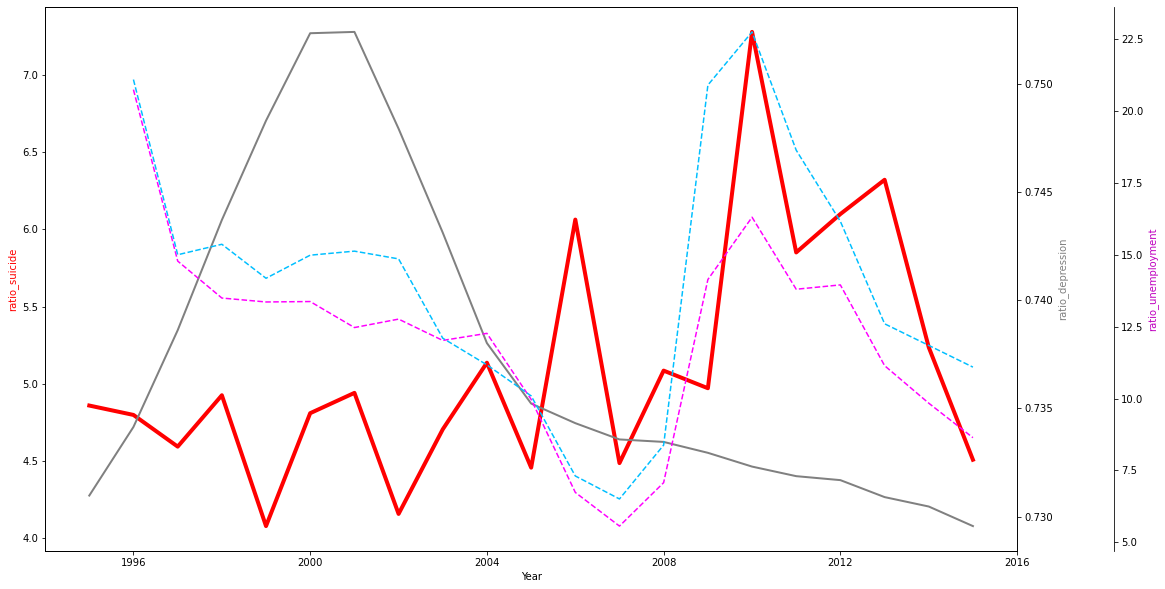

In [44]:
plot_ratios('Latvia')

In [34]:
#building the model and see the coeficients



def model_country(country):
    df=ratio_FM(country).dropna()
    df = sm.add_constant(df)
    y = df['ratio_suicide']
    X = df[[ 'const','unemployment_x','unemployment_y', 'ratio_depression']]
    lin_reg = sm.OLS(y, X).fit()
    return lin_reg.summary()

In [35]:
model_country('Belarus')

C:\Users\johnz\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\johnz\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\johnz\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\johnz\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\johnz\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ratio_suicide   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 17 Sep 2020   Prob (F-statistic):                nan
Time:                        09:59:33   Log-Likelihood:                 95.361
No. Observations:                   4   AIC:                            -182.7
Df Residuals:                       0   BIC:                            -185.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2809.2362        inf         -0        nan         nan         nan
unemployment_x     -70.2699        inf         -0        nan         nan         nan
unemployment_y      61.6520        inf          0        nan         nan         nan
ratio_depression  3983.6669        inf          0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.250
Skew:                           0.372   Prob(JB):                        0.883
Kurtosis:                       2.029   Cond. No.                     6.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
### per year

In [17]:
def data_year(year):
    i=df.loc[df['year']==pd.to_datetime(year, format='%Y')]
    return i

In [37]:
data_year('1996')

,year,country,sex,suicides_no,population,HDIforyear,gdp_for_year($),gdp_per_capita($),unemployment,depression_rate,suicides_per_100K
1310,1996-01-01,Albania,female,39,1496000,NaN,3314898292,1127,13.600000,2.693542,2.606952
1311,1996-01-01,Albania,male,50,1444200,NaN,3314898292,1127,11.400000,1.616876,3.462124
1312,1996-01-01,Argentina,female,532,16252800,NaN,272149750000,8563,19.309999,4.542759,3.273282
1313,1996-01-01,Argentina,male,1697,15527900,NaN,272149750000,8563,15.730000,2.629910,10.928715
1314,1996-01-01,Armenia,female,24,1807800,NaN,1596968913,458,15.200000,3.113436,1.327580
...,...,...,...,...,...,...,...,...,...,...,...
1459,1996-01-01,United States,male,24980,119942600,NaN,8100201000000,32928,5.435300,3.512402,20.826629
1460,1996-01-01,Uruguay,female,86,1537456,NaN,20515543039,6914,NaN,4.097826,5.593656
1461,1996-01-01,Uruguay,male,307,1429822,NaN,20515543039,6914,NaN,2.477654,21.471204
1462,1996-01-01,Uzbekistan,female,367,10041800,NaN,13948892216,703,NaN,3.453355,3.654723


In [31]:


def plot_gdp_suicide(year):
    fig, ax = plt.subplots(figsize=(10,10))

    ax = sns.scatterplot(x=data_year(year)['HDIforyear'],
                         y=data_year(year)['suicides_per_100K'],
                         hue=data_year(year)['sex'], data=data_year(year))
    
    fig, ax2 = plt.subplots(figsize=(10,10)) 
    
    ax2 = sns.scatterplot(x=data_year(year)['gdp_for_year($)'],
                        y=data_year(year)['suicides_per_100K'],
                         hue=data_year(year)['sex'], data=data_year(year))
    plt.xscale('log')

    
    ax.set_xlabel("HDIforyear")
    ax.set_ylabel("suicides_per_100Ks")

    fig, ax2 = plt.subplots(figsize=(10,10)) 
    
    ax3 = sns.scatterplot(x=data_year(year)['depression_rate'],
                        y=data_year(year)['suicides_per_100K'],
                         hue=data_year(year)['sex'], data=data_year(year))


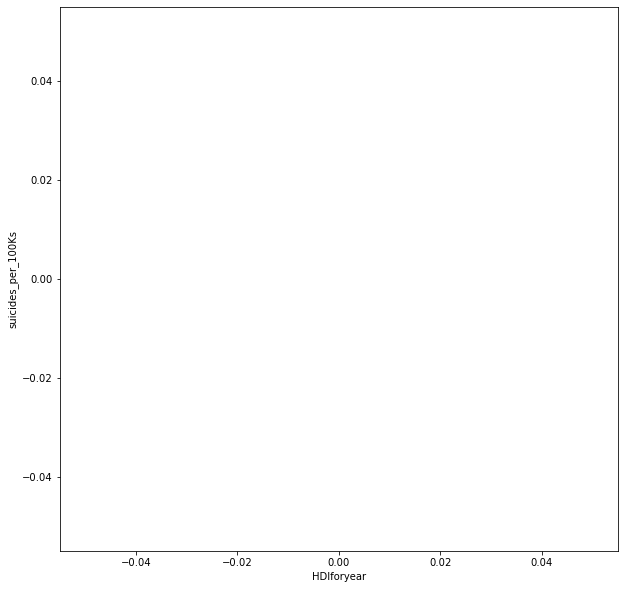

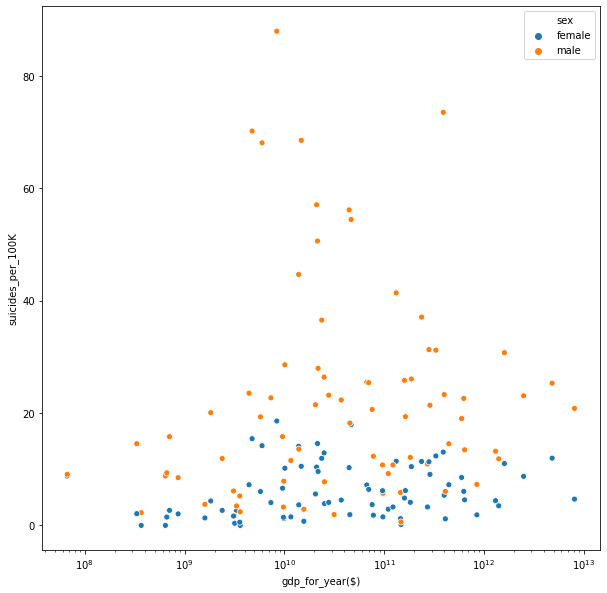

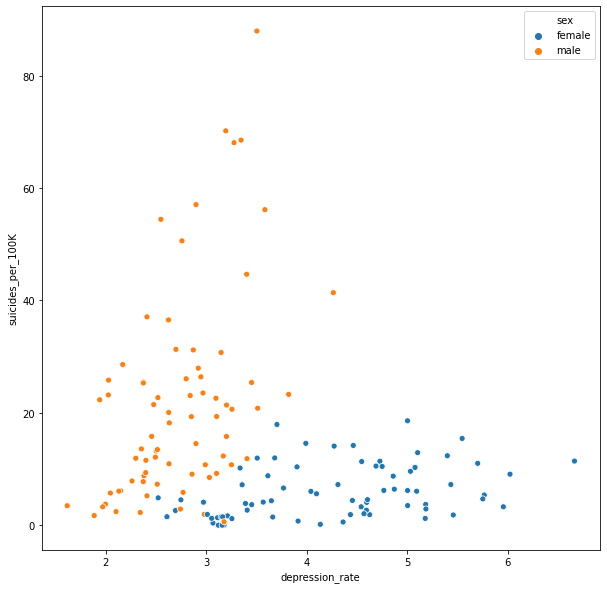

In [38]:
plot_gdp_suicide('1996')

In [26]:

def year_country_gdp(year):
    
    #table for female
    f=data_year(year).loc[data_year(year)['sex']=='female']
    #table for male
    m=data_year(year).loc[data_year(year)['sex']=='male']
    #join them
    i=pd.merge(f, m,  how='left', left_on=['country','year'], 
                          right_on = ['country','year'])
    
    #create the ratios
    i['suicide_ratio']=abs(i['suicides_per_100K_y']-i['suicides_per_100K_x'])
    i['ratio_depression']=abs(i['depression_rate_y']-i['depression_rate_x'])
    i['ratio_unemployment']=i['unemployment_y']-i['unemployment_x']
    
    return i[['year','country','gdp_per_capita($)_y','suicides_per_100K_y','suicides_per_100K_x','suicide_ratio','ratio_depression','unemployment_y','unemployment_x']].copy()
    

In [39]:
year_country_gdp('2006')

,year,country,gdp_per_capita($)_y,suicides_per_100K_y,suicides_per_100K_x,suicide_ratio,ratio_depression,unemployment_y,unemployment_x
0,2006-01-01,Albania,3235,0.000000,0.000000,0.000000,1.103156,11.8000,16.799999
1,2006-01-01,Antigua and Barbuda,14114,0.000000,0.000000,0.000000,1.064279,NaN,NaN
2,2006-01-01,Argentina,6475,14.264295,3.322358,10.941937,1.850972,8.3622,12.340800
3,2006-01-01,Armenia,2310,4.741750,1.150241,3.591508,0.982116,NaN,NaN
4,2006-01-01,Aruba,25622,15.654702,4.016629,11.638073,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
80,2006-01-01,Ukraine,2418,40.583394,7.105431,33.477963,1.477623,7.0047,6.603100
81,2006-01-01,United Arab Emirates,45110,2.119836,1.045794,1.074042,0.960603,NaN,NaN
82,2006-01-01,United Kingdom,47163,11.417815,3.206867,8.210948,1.559905,5.6934,4.945500
83,2006-01-01,United States,49666,19.187222,4.927051,14.260171,2.512669,4.6193,4.627400


In [42]:
#building the model and see the coeficients



def model_per_year(year):
    
    df=year_country_gdp(year).dropna()
    df = sm.add_constant(df)
    y = df['suicides_per_100K_y']
    X = df[[ 'const','unemployment_y', 'ratio_depression']]
    lin_reg = sm.OLS(y, X).fit()
    return lin_reg.summary()

In [43]:
model_per_year('1996')

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     suicides_per_100K_y   R-squared:                       0.048
Model:                             OLS   Adj. R-squared:                  0.012
Method:                  Least Squares   F-statistic:                     1.333
Date:                 Thu, 17 Sep 2020   Prob (F-statistic):              0.272
Time:                         11:17:03   Log-Likelihood:                -236.29
No. Observations:                   56   AIC:                             478.6
Df Residuals:                       53   BIC:                             484.7
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               10.0712      8.144      1.237      0.222      -6.263      26.405
unemployment_y       0.8284      0.559      1.482      0.144      -0.292       1.949
ratio_depression     3.0960      3.644      0.850      0.399      -4.213      10.405
==============================================================================
Omnibus:                       16.710   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.418
Skew:                           1.294   Prob(JB):                     6.07e-05
Kurtosis:                       4.273   Cond. No.                         35.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""